# Advanced Programming project
### By Angelo, Elena and Shaya
#### Introduction
This is a small study on factors that influence the satisfaction of airline passengers. When it comes to satisfaction of airline passengers, a lot of factors can contribute to their experience, this can be before, during or after the flight. We found a dataset where we can get an overview of ratings from passengers and their overall satisfaction. Our task is to find out which factors contribute the most to the satisfaction of these airline passengers.

In [1]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('flight-info-datasets/airline_passenger_satisfaction.csv')
df['Age'] = df['Age'].apply(pd.to_numeric) # convert age to numeric values
df = df[df['Age'] >= 18] # select rows with passengers age 18 and over
df['Satisfaction'].value_counts(normalize=True)

Neutral or Dissatisfied    0.543617
Satisfied                  0.456383
Name: Satisfaction, dtype: float64

In [2]:
df.groupby('Class')['Satisfaction'].value_counts(normalize=True)

Class         Satisfaction           
Business      Satisfied                  0.702336
              Neutral or Dissatisfied    0.297664
Economy       Neutral or Dissatisfied    0.802787
              Satisfied                  0.197213
Economy Plus  Neutral or Dissatisfied    0.738184
              Satisfied                  0.261816
Name: Satisfaction, dtype: float64

To familiarize with the dataset, we look at what kind of passengers are included and what their overall satisfaction is. Out of the intial dataset we can see that more than half of airline passengers felt neutral or dissatisfied about their flight. In addition, as many as 80% of Economy Class felt unsatisfied. Bussiness class passengers turn out to be the most satisfied with 70% satisfied.

In [3]:
# Angelo
df.head() # Overview of dataframe (5 rows)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


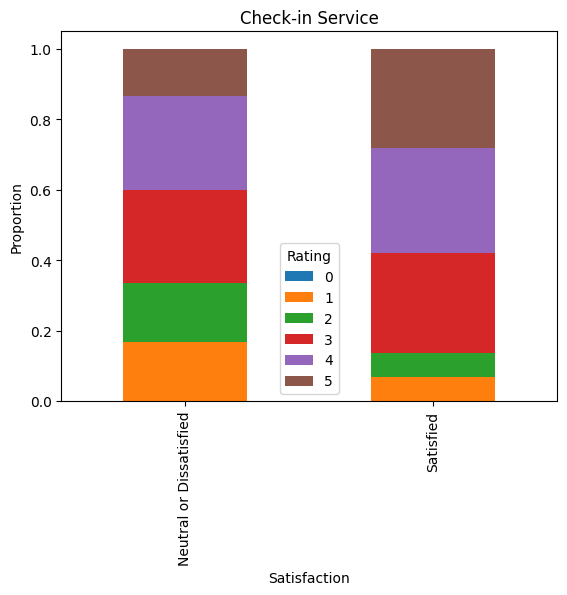

In [4]:
# Shaya
def plotbars(factor):
    """Plots chart in the form of stacked bars, showing occurrence of rating of the factor, 
    in descending order, and sorted by satisfaction."""
    # Group by satisfaction and factor, and count the occurences
    rating = df.groupby(['Satisfaction', factor]).size().unstack()
    # Turning occurences into proportion floats
    total = rating.sum(axis=1)
    rating =rating.div(total, axis=0)
    # Sorting in descending order
    rating = rating.apply(lambda x: x.sort_values(ascending=False), axis=1)
    bars = rating.plot(kind='bar', stacked=True)
    # Set labels
    bars.legend(title='Rating')
    bars.set_ylabel('Proportion')
    bars.set_title(factor)
    
# Check-in Service
plotbars('Check-in Service')


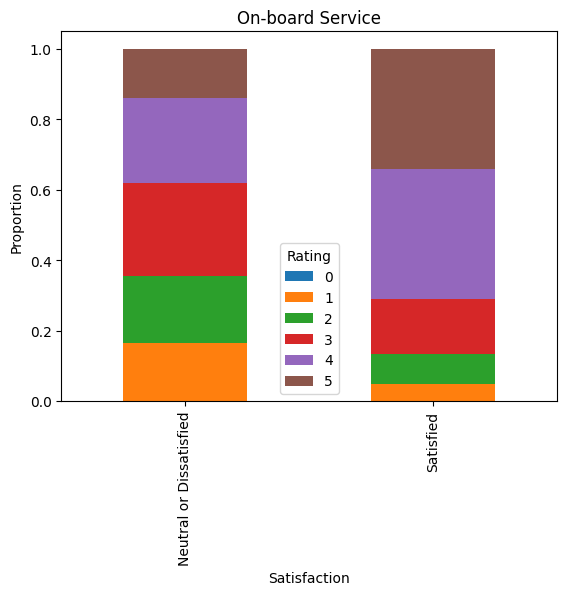

In [5]:
# On-board Service
plotbars('On-board Service')

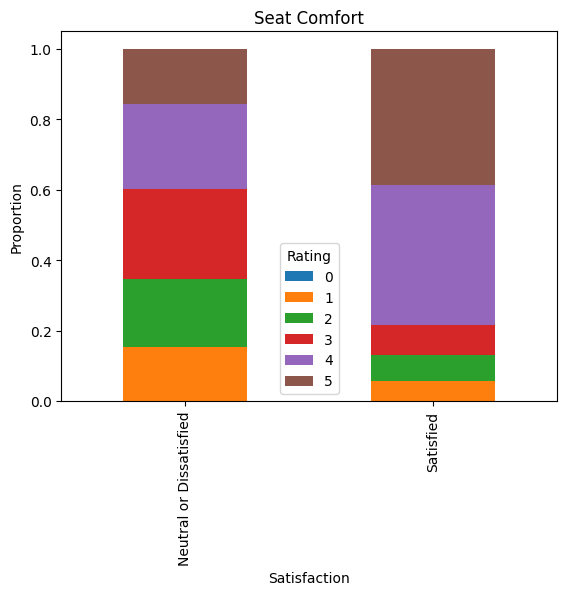

In [6]:
# Seat Comfort
plotbars('Seat Comfort')

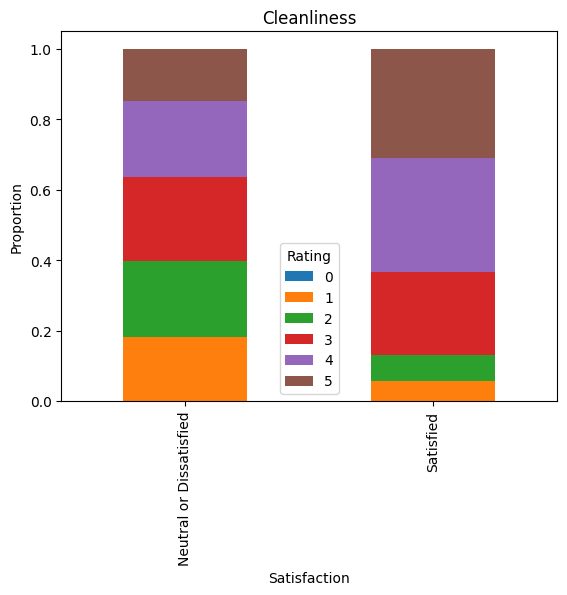

In [7]:
# Cleanliness
plotbars('Cleanliness')

Findings above tell us that the differences between the ratings of the factors are not high. However, one visible change is seen in cleanliness, where even satisfied passengers give a relatively low rating to this factor. Same goes for Check-in Service, the satisfied passengers' median rating is 3.

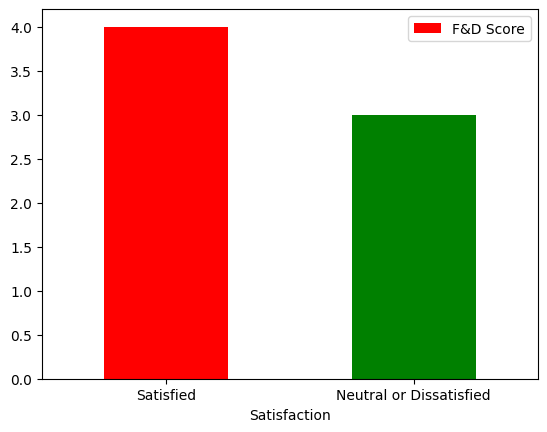

In [8]:
# Angelo
# Compares median F&D score of both satisfaction levels
satisfied = df[df['Satisfaction'] == 'Satisfied']['Food and Drink'].median()
unsatisfied = df[df['Satisfaction'] == 'Neutral or Dissatisfied']['Food and Drink'].median()
fd_score_df = pd.DataFrame({'Satisfaction':['Satisfied', 'Neutral or Dissatisfied'], 'F&D Score':[satisfied, unsatisfied]})
fd_score_df.plot.bar(x='Satisfaction', y='F&D Score', color=['red', 'green'], rot=0);

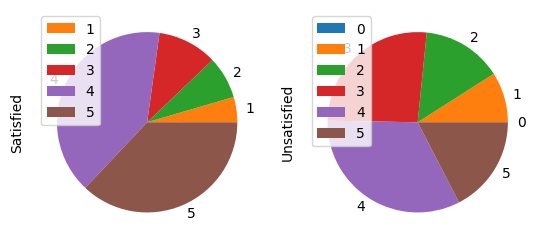

In [9]:
def pair_to_subpies(dframe, category, column, chosen_vals):
    '''For category plots pie subplot pair for chosen values of a dataframe column visualizing category value-counts'''
    ser_list = form_pair(dframe, category, column, chosen_vals)
    plot_pie_subplots(ser_list[0], ser_list[1])
         
        
def form_pair(dframe, categ, col, chosen_vals):
    '''Forms value-counted series of a category for both chosen values of a dataframe column'''
    series1 = dframe[dframe[col] == chosen_vals[0]][categ].value_counts()
    series2 = dframe[dframe[col] == chosen_vals[1]][categ].value_counts()
    return series1, series2


def plot_pie_subplots(satis_vals, unsatis_vals):
    '''Forms dataframe of 2 series and displays them as pie subplots'''
    pair_vals_df = pd.DataFrame({'Satisfied': satis_vals, 'Unsatisfied': unsatis_vals})[0:6] # Scores 1-5
    return pair_vals_df.plot.pie(subplots=True);

pair_to_subpies(df, 'In-flight Service', 'Satisfaction', ['Satisfied', 'Neutral or Dissatisfied'])

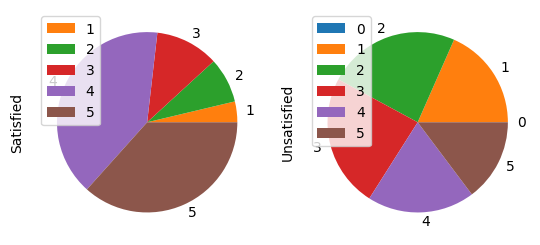

In [10]:
# In-flight Entertainment
pair_to_subpies(df, 'In-flight Entertainment', 'Satisfaction', ['Satisfied', 'Neutral or Dissatisfied'])

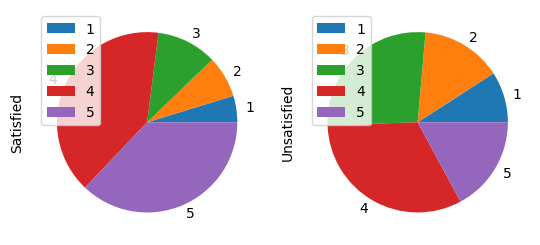

In [11]:
# Baggage Handling
pair_to_subpies(df, 'Baggage Handling', 'Satisfaction', ['Satisfied', 'Neutral or Dissatisfied'])